<left><img src="https://github.com/pandas-dev/pandas/raw/main/web/pandas/static/img/pandas.svg" alt="pandas Logo" style="width: 200px;"/></left>
<right><img src="https://matplotlib.org/stable/_images/sphx_glr_logos2_003.png" style="width: 200px;"/></right>

# Pandas and Matplotlib - EMODNET
---

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

import datetime
from pathlib import Path


## Load ERDDAP data

 [ERDDAP](https://coastwatch.pfeg.noaa.gov/erddapinfo/) is a data server that gives you a simple, consistent way to download data in the format and the spatial and temporal coverage that you want. ERDDAP is a web application with an interface for people to use. It is also a RESTful web service that allows data access directly from any computer program (e.g. Matlab, R, or webpages)."

This notebook uses the python client [erddapy](https://pyoceans.github.io/erddapy) to help construct the RESTful URLs and translate the responses into Pandas and Xarray objects. 

A typical ERDDAP RESTful URL looks like:

[https://data.ioos.us/gliders/erddap/tabledap/whoi_406-20160902T1700.mat?depth,latitude,longitude,salinity,temperature,time&time>=2016-07-10T00:00:00Z&time<=2017-02-10T00:00:00Z &latitude>=38.0&latitude<=41.0&longitude>=-72.0&longitude<=-69.0](https://data.ioos.us/gliders/erddap/tabledap/whoi_406-20160902T1700.mat?depth,latitude,longitude,salinity,temperature,time&time>=2016-07-10T00:00:00Z&time<=2017-02-10T00:00:00Z&latitude>=38.0&latitude<=41.0&longitude>=-72.0&longitude<=-69.0)

Let's break it down to smaller parts:

- **server**: https://data.ioos.us/gliders/erddap/
- **protocol**: tabledap
- **dataset_id**: whoi_406-20160902T1700
- **response**: .mat
- **variables**: depth,latitude,longitude,temperature,time
- **constraints**:
    - time>=2016-07-10T00:00:00Z
    - time<=2017-02-10T00:00:00Z
    - latitude>=38.0
    - latitude<=41.0
    - longitude>=-72.0
    - longitude<=-69.0

### EMODNET:  
https://emodnet.ec.europa.eu/en/emodnet-web-service-documentation#non-ogc-web-services

erddap EMODNET physics:  
https://prod-erddap.emodnet-physics.eu/erddap/index.html  
https://prod-erddap.emodnet-physics.eu/erddap/tabledap/documentation.html  

### erddapy  
https://github.com/ioos/erddapy

>pip install erddapy

In [13]:
from erddapy import ERDDAP
from erddapy.core.url import urlopen

In [2]:
# ERDDAP for EMODNET Physics
server = 'https://coastwatch.pfeg.noaa.gov/erddap'
protocol = 'tabledap'
emodnet = ERDDAP(server=server, protocol=protocol)


server = 'https://prod-erddap.emodnet-physics.eu/erddap'
protocol = 'tabledap'
emodnet = ERDDAP(server=server, protocol=protocol)

In [10]:
min_time = '2010-01-01T00:00:00Z'
max_time = '2012-12-31T23:00:00Z'
min_lon, max_lon = -17, -15
min_lat, max_lat = 44.1, 44.5

In [14]:
kw = {
    'min_lon': min_lon,'max_lon': max_lon,'min_lat': min_lat,'max_lat': max_lat,
    'min_time': min_time,'max_time': max_time
}

search_url = emodnet.get_search_url(response='csv', **kw)
search_df = pd.read_csv(urlopen(search_url))
search_df = search_df[['Institution', 'Dataset ID','tabledap']]
search_df

,Institution,Dataset ID,tabledap
0,GLODAP,GLODAPv2_2021,https://prod-erddap.emodnet-physics.eu/erddap/...


In [15]:
dataset_id = 'GLODAPv2_2021'
emodnet.dataset_id = dataset_id
emodnet.response = "csv"
emodnet.constraints = {
     "time>=": min_time,
     "time<=": max_time,
    "latitude>=": min_lat,
    "latitude<=": max_lat,
    "longitude>=": min_lon,
    "longitude<=": max_lon,
}
emodnet.variables = ["longitude", "latitude", "time",
    "G2temperature", "G2salinity", "G2pressure"
]

df = emodnet.to_pandas()

ReadTimeout: The read operation timed out

In [22]:
df

,longitude (degrees_east),latitude (degrees_north),time (UTC),G2temperature,G2salinity (PSU),G2pressure
0,-16.094,44.420,1992-05-17T00:00:00Z,14.8000,35.490,5.0381
1,-16.094,44.420,1992-05-17T00:00:00Z,14.8000,35.534,5.0381
2,-16.666,44.500,2001-02-07T00:00:00Z,12.4400,35.650,23.2000
3,-16.666,44.500,2001-02-07T00:00:00Z,12.4400,35.650,51.3000
4,-16.666,44.500,2001-02-07T00:00:00Z,12.4400,35.650,152.0000
5,-16.666,44.500,2001-02-07T00:00:00Z,12.4200,35.648,202.5000
6,-16.666,44.500,2001-02-07T00:00:00Z,11.8600,35.579,303.0000
7,-16.666,44.500,2001-02-07T00:00:00Z,11.4000,35.539,403.0000
8,-16.666,44.500,2001-02-07T00:00:00Z,10.9800,35.507,502.0000
9,-16.666,44.500,2001-02-07T00:00:00Z,10.5400,35.506,604.0000


---

## The pandas [`DataFrame`](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe)...
...is a **labeled**, two-dimensional columnar structure, similar to a table, spreadsheet, or the R `data.frame`.

![dataframe schematic](https://github.com/pandas-dev/pandas/raw/main/doc/source/_static/schemas/01_table_dataframe.svg "Schematic of a pandas DataFrame")

The `columns` that make up our `DataFrame` can be lists, dictionaries, NumPy arrays, pandas `Series`, or many other data types not mentioned here. Within these `columns`, you can have data values of many different data types used in Python and NumPy, including text, numbers, and dates/times. The first column of a `DataFrame`, shown in the image above in dark gray, is uniquely referred to as an `index`; this column contains information characterizing each row of our `DataFrame`. Similar to any other `column`, the `index` can label rows by text, numbers, datetime objects, and many other data types. Datetime objects are a quite popular way to label rows.

For our first example using Pandas DataFrames, we start by reading in some data in comma-separated value (`.csv`) format. We retrieve this dataset from the Pythia DATASETS class (imported at the top of this page); however, the dataset was originally contained within the NCDC teleconnections database. This dataset contains many types of geoscientific data, including El Nino/Southern Oscillation indices. For more information on this dataset, review the description [here](https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst/).

In [23]:
df

,longitude (degrees_east),latitude (degrees_north),time (UTC),G2temperature,G2salinity (PSU),G2pressure
0,-16.094,44.420,1992-05-17T00:00:00Z,14.8000,35.490,5.0381
1,-16.094,44.420,1992-05-17T00:00:00Z,14.8000,35.534,5.0381
2,-16.666,44.500,2001-02-07T00:00:00Z,12.4400,35.650,23.2000
3,-16.666,44.500,2001-02-07T00:00:00Z,12.4400,35.650,51.3000
4,-16.666,44.500,2001-02-07T00:00:00Z,12.4400,35.650,152.0000
5,-16.666,44.500,2001-02-07T00:00:00Z,12.4200,35.648,202.5000
6,-16.666,44.500,2001-02-07T00:00:00Z,11.8600,35.579,303.0000
7,-16.666,44.500,2001-02-07T00:00:00Z,11.4000,35.539,403.0000
8,-16.666,44.500,2001-02-07T00:00:00Z,10.9800,35.507,502.0000
9,-16.666,44.500,2001-02-07T00:00:00Z,10.5400,35.506,604.0000


In [24]:
# Set index
df.set_index(pd.to_datetime(df['time (UTC)']), inplace=True)

In [25]:
df

,longitude (degrees_east),latitude (degrees_north),time (UTC),G2temperature,G2salinity (PSU),G2pressure
time (UTC),,,,,,
1992-05-17 00:00:00+00:00,-16.094,44.420,1992-05-17T00:00:00Z,14.8000,35.490,5.0381
1992-05-17 00:00:00+00:00,-16.094,44.420,1992-05-17T00:00:00Z,14.8000,35.534,5.0381
2001-02-07 00:00:00+00:00,-16.666,44.500,2001-02-07T00:00:00Z,12.4400,35.650,23.2000
2001-02-07 00:00:00+00:00,-16.666,44.500,2001-02-07T00:00:00Z,12.4400,35.650,51.3000
2001-02-07 00:00:00+00:00,-16.666,44.500,2001-02-07T00:00:00Z,12.4400,35.650,152.0000
2001-02-07 00:00:00+00:00,-16.666,44.500,2001-02-07T00:00:00Z,12.4200,35.648,202.5000
2001-02-07 00:00:00+00:00,-16.666,44.500,2001-02-07T00:00:00Z,11.8600,35.579,303.0000
2001-02-07 00:00:00+00:00,-16.666,44.500,2001-02-07T00:00:00Z,11.4000,35.539,403.0000
2001-02-07 00:00:00+00:00,-16.666,44.500,2001-02-07T00:00:00Z,10.9800,35.507,502.0000


In [26]:
df.index[0]

Timestamp('1992-05-17 00:00:00+0000', tz='UTC')

### Read file

In [16]:
p_file = Path('__file__').resolve()
dir_data = p_file.parents[0] / 'data'

fnd = dir_data / 'GLODAPv2.2021.csv'
df2 = pd.read_table(fnd, sep=',')
df2

,G2cruise,G2region,G2station,G2cast,G2year,G2month,G2day,G2hour,G2minute,G2latitude,...,G2toc,G2tocf,G2doc,G2docf,G2don,G2donf,G2tdn,G2tdnf,G2chla,G2chlaf
0,1,4,319,1,1984,7,20,14,46,80.567,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9
1,1,4,319,1,1984,7,20,14,46,80.567,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9
2,1,4,319,1,1984,7,20,14,46,80.567,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9
3,1,4,319,1,1984,7,20,14,46,80.567,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9
4,1,4,319,1,1984,7,20,14,46,80.567,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1,4,324,1,1984,7,22,2,48,81.197,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9
85,1,4,324,1,1984,7,22,2,48,81.197,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9
86,1,4,324,1,1984,7,22,2,48,81.197,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9
87,1,4,324,1,1984,7,22,2,48,81.197,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9


The `DataFrame` index, as described above, contains information characterizing rows; each row has a unique ID value, which is displayed in the index column.  By default, the IDs for rows in a `DataFrame` are represented as sequential integers, which start at 0.

In [28]:
df.index

DatetimeIndex(['1992-05-17 00:00:00+00:00', '1992-05-17 00:00:00+00:00',
               '2001-02-07 00:00:00+00:00', '2001-02-07 00:00:00+00:00',
               '2001-02-07 00:00:00+00:00', '2001-02-07 00:00:00+00:00',
               '2001-02-07 00:00:00+00:00', '2001-02-07 00:00:00+00:00',
               '2001-02-07 00:00:00+00:00', '2001-02-07 00:00:00+00:00',
               '2001-02-07 00:00:00+00:00', '2001-02-07 00:00:00+00:00',
               '2001-02-07 00:00:00+00:00', '2001-02-07 00:00:00+00:00',
               '2001-08-26 00:00:00+00:00', '2001-08-26 00:00:00+00:00',
               '2001-08-26 00:00:00+00:00', '2001-08-26 00:00:00+00:00',
               '2001-08-26 00:00:00+00:00', '2001-08-26 00:00:00+00:00',
               '2001-08-26 00:00:00+00:00', '2001-08-26 00:00:00+00:00',
               '2001-08-26 00:00:00+00:00', '2001-08-26 00:00:00+00:00',
               '2001-08-26 00:00:00+00:00', '2001-08-26 00:00:00+00:00',
               '2001-08-26 00:00:00+00:00', '2001-0

At the moment, the index column of our `DataFrame` is not very helpful for humans. However, Pandas has clever ways to make index columns more human-readable. The next example demonstrates how to use optional keyword arguments to convert `DataFrame` index IDs to a human-friendly datetime format.

In [23]:
# For pandas version > 2.0
# df2 = pd.read_table(fnd, sep=',', dtype={'G2year': int, 'G2month': int, 'G2day': int, 
#                                                        'G2hour': int, 'G2minute': int},
#                     parse_dates={'time': ['G2year', 'G2month', 'G2day', 'G2hour', 'G2minute']},
#                     date_format='%Y %m %d %H %M', 
# )

df2 = pd.read_table(fnd, sep=',', dtype={'G2year': int, 'G2month': int, 'G2day': int, 
                                                       'G2hour': int, 'G2minute': int},
                    parse_dates={'time': ['G2year', 'G2month', 'G2day', 'G2hour', 'G2minute']},
                    infer_datetime_format=True, 
)
df2 
# date was not recognized!

,time,G2cruise,G2region,G2station,G2cast,G2latitude,G2longitude,G2bottomdepth,G2maxsampdepth,G2bottle,...,G2toc,G2tocf,G2doc,G2docf,G2don,G2donf,G2tdn,G2tdnf,G2chla,G2chlaf
0,1984 7 20 14 46,1,4,319,1,80.567,7.2267,733,724,1,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9
1,1984 7 20 14 46,1,4,319,1,80.567,7.2267,733,724,2,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9
2,1984 7 20 14 46,1,4,319,1,80.567,7.2267,733,724,3,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9
3,1984 7 20 14 46,1,4,319,1,80.567,7.2267,733,724,4,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9
4,1984 7 20 14 46,1,4,319,1,80.567,7.2267,733,724,5,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1984 7 22 2 48,1,4,324,1,81.197,16.7930,1258,1252,22,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9
85,1984 7 22 2 48,1,4,324,1,81.197,16.7930,1258,1252,21,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9
86,1984 7 22 2 48,1,4,324,1,81.197,16.7930,1258,1252,19,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9
87,1984 7 22 2 48,1,4,324,1,81.197,16.7930,1258,1252,18,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9


In [36]:
import datetime as dt
df2 = pd.read_table(fnd, sep=',', dtype={'G2year': int, 'G2month': int, 'G2day': int, 
                                                       'G2hour': int, 'G2minute': int})
pd.to_datetime(dt.datetime(df2.G2year.values, df2.G2month.values)) 


TypeError: an integer is required (got type list)

In [34]:
df2.G2year.values

array([1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984,
       1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984,
       1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984,
       1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984,
       1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984,
       1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984,
       1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984,
       1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984,
       1984])

In [20]:
df2.time[0]

'1984 7 20 14 46'

In [21]:
df2.drop('time', axis=1)

,G2cruise,G2region,G2station,G2cast,G2latitude,G2longitude,G2bottomdepth,G2maxsampdepth,G2bottle,G2pressure,...,G2toc,G2tocf,G2doc,G2docf,G2don,G2donf,G2tdn,G2tdnf,G2chla,G2chlaf
0,1,4,319,1,80.567,7.2267,733,724,1,8.6,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9
1,1,4,319,1,80.567,7.2267,733,724,2,8.6,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9
2,1,4,319,1,80.567,7.2267,733,724,3,48.9,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9
3,1,4,319,1,80.567,7.2267,733,724,4,48.9,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9
4,1,4,319,1,80.567,7.2267,733,724,5,148.0,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1,4,324,1,81.197,16.7930,1258,1252,22,68.0,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9
85,1,4,324,1,81.197,16.7930,1258,1252,21,104.0,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9
86,1,4,324,1,81.197,16.7930,1258,1252,19,148.0,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9
87,1,4,324,1,81.197,16.7930,1258,1252,18,197.0,...,-9999,9,-9999,9,-9999,9,-9999,9,-9999,9


Each of our data rows is now helpfully labeled by a datetime-object-like index value; this means that we can now easily identify data values not only by named columns, but also by date labels on rows. This is a sneak preview of the `DatetimeIndex` functionality of Pandas; this functionality enables a large portion of Pandas' timeseries-related usage. Don't worry; `DatetimeIndex` will be discussed in full detail later on this page. In the meantime, let's look at the columns of data read in from the `.csv` file:

In [31]:
df.columns

Index(['longitude (degrees_east)', 'latitude (degrees_north)', 'time (UTC)',
       'G2temperature', 'G2salinity (PSU)', 'G2pressure'],
      dtype='object')

## The pandas [`Series`](https://pandas.pydata.org/docs/user_guide/dsintro.html#series)...

...is essentially any one of the columns of our `DataFrame`. A `Series` also includes the index column from the source `DataFrame`, in order to provide a label for each value in the `Series`.

![pandas Series](https://github.com/pandas-dev/pandas/raw/main/doc/source/_static/schemas/01_table_series.svg "Schematic of a pandas Series")

The pandas `Series` is a fast and capable 1-dimensional array of nearly any data type we could want, and it can behave very similarly to a NumPy `ndarray` or a Python `dict`. You can take a look at any of the `Series` that make up your `DataFrame`, either by using its column name and the Python `dict` notation, or by using dot-shorthand with the column name:

### Get columns informations  

df['name']  
df.name 

if name is a number  
df[145]  
df.15 is not valid!

In [32]:
df['G2temperature']

time (UTC)
1992-05-17 00:00:00+00:00    14.8000
1992-05-17 00:00:00+00:00    14.8000
2001-02-07 00:00:00+00:00    12.4400
2001-02-07 00:00:00+00:00    12.4400
2001-02-07 00:00:00+00:00    12.4400
2001-02-07 00:00:00+00:00    12.4200
2001-02-07 00:00:00+00:00    11.8600
2001-02-07 00:00:00+00:00    11.4000
2001-02-07 00:00:00+00:00    10.9800
2001-02-07 00:00:00+00:00    10.5400
2001-02-07 00:00:00+00:00     9.7900
2001-02-07 00:00:00+00:00     9.1700
2001-02-07 00:00:00+00:00     4.2900
2001-02-07 00:00:00+00:00     3.2600
2001-08-26 00:00:00+00:00    19.7120
2001-08-26 00:00:00+00:00    19.7080
2001-08-26 00:00:00+00:00    16.5560
2001-08-26 00:00:00+00:00    13.4130
2001-08-26 00:00:00+00:00    12.9300
2001-08-26 00:00:00+00:00    12.4790
2001-08-26 00:00:00+00:00    11.9430
2001-08-26 00:00:00+00:00    11.4980
2001-08-26 00:00:00+00:00    11.0650
2001-08-26 00:00:00+00:00    10.6210
2001-08-26 00:00:00+00:00    10.1840
2001-08-26 00:00:00+00:00     9.4920
2001-08-26 00:00:00+00:00  

<div class="alert alert-block alert-info">
<b>Tip:</b> You can also use the dot notation illustrated below to specify a column name, but this syntax is mostly provided for convenience. For the most part, this notation is interchangeable with the dictionary notation; however, if the column name is not a valid Python identifier (e.g., it starts with a number or space), you cannot use dot notation.</div>

In [33]:
df.G2temperature

time (UTC)
1992-05-17 00:00:00+00:00    14.8000
1992-05-17 00:00:00+00:00    14.8000
2001-02-07 00:00:00+00:00    12.4400
2001-02-07 00:00:00+00:00    12.4400
2001-02-07 00:00:00+00:00    12.4400
2001-02-07 00:00:00+00:00    12.4200
2001-02-07 00:00:00+00:00    11.8600
2001-02-07 00:00:00+00:00    11.4000
2001-02-07 00:00:00+00:00    10.9800
2001-02-07 00:00:00+00:00    10.5400
2001-02-07 00:00:00+00:00     9.7900
2001-02-07 00:00:00+00:00     9.1700
2001-02-07 00:00:00+00:00     4.2900
2001-02-07 00:00:00+00:00     3.2600
2001-08-26 00:00:00+00:00    19.7120
2001-08-26 00:00:00+00:00    19.7080
2001-08-26 00:00:00+00:00    16.5560
2001-08-26 00:00:00+00:00    13.4130
2001-08-26 00:00:00+00:00    12.9300
2001-08-26 00:00:00+00:00    12.4790
2001-08-26 00:00:00+00:00    11.9430
2001-08-26 00:00:00+00:00    11.4980
2001-08-26 00:00:00+00:00    11.0650
2001-08-26 00:00:00+00:00    10.6210
2001-08-26 00:00:00+00:00    10.1840
2001-08-26 00:00:00+00:00     9.4920
2001-08-26 00:00:00+00:00  

In [34]:
df = pd.read_table('data/data_waves.dat', header=None, delim_whitespace=True, 
                   names=['YY', 'mm', 'DD', 'time', 'hs', 'tm', 'tp', 'dirm', 'dp', 'spr', 'h', 'lm', 'lp', 
                          'uw', 'vw'],
                  parse_dates=[[0, 1, 2, 3]], index_col=0)
df

,hs,tm,tp,dirm,dp,spr,h,lm,lp,uw,vw
YY_mm_DD_time,,,,,,,,,,,
1979-01-01 05:00:00,2.817,6.8,7.7,226.8,223.4,27.2,80.02,76.40,93.04,10.30,3.32
1979-01-01 06:00:00,3.407,7.4,8.5,229.8,226.5,25.6,80.02,91.55,112.80,13.27,3.68
1979-01-01 07:00:00,4.644,8.1,9.3,231.5,229.2,24.7,80.02,110.38,135.01,17.11,6.84
1979-01-01 08:00:00,5.131,8.6,9.9,230.7,225.0,25.3,80.02,122.50,152.12,16.92,6.68
1979-01-01 09:00:00,4.297,8.6,9.9,228.4,221.1,27.5,80.02,123.26,153.09,10.32,-4.45
...,...,...,...,...,...,...,...,...,...,...,...
2000-12-31 19:00:00,0.618,7.7,11.5,217.1,218.6,62.5,80.02,124.21,204.12,-5.79,-4.57
2000-12-31 20:00:00,0.579,6.8,12.1,197.1,219.6,71.1,80.02,103.68,225.18,-5.20,-4.69
2000-12-31 21:00:00,0.537,6.2,12.0,165.5,221.5,73.3,80.02,88.59,219.36,-5.06,-4.21


### Using `.iloc` and `.loc` to index

In this section, we introduce ways to access data that are preferred by Pandas over the methods listed above. When accessing by label, it is preferred to use the `.loc` method, and when accessing by index, the `.iloc` method is preferred. These methods behave similarly to the notation introduced above, but provide more speed, security, and rigor in your value selection. Using these methods can also help you avoid [chained assignment warnings](https://pandas.pydata.org/docs/user_guide/indexing.html#returning-a-view-versus-a-copy) generated by pandas.

In [35]:
df["1982-01-01":"1982-12-01"]

,hs,tm,tp,dirm,dp,spr,h,lm,lp,uw,vw
YY_mm_DD_time,,,,,,,,,,,
1982-01-01 00:00:00,1.297,6.6,8.9,208.7,227.7,36.1,80.02,75.95,124.17,-4.07,-1.07
1982-01-01 01:00:00,1.212,6.7,8.6,211.7,226.9,30.9,80.02,77.72,116.02,-4.07,-1.07
1982-01-01 02:00:00,1.152,6.6,8.4,212.7,226.4,32.3,80.02,76.28,110.40,-5.33,-3.31
1982-01-01 03:00:00,1.086,6.6,8.3,213.6,225.9,30.2,80.02,75.78,108.50,-4.65,0.10
1982-01-01 04:00:00,1.045,6.5,8.3,212.1,225.8,31.5,80.02,72.94,106.77,-5.44,2.38
...,...,...,...,...,...,...,...,...,...,...,...
1982-12-01 19:00:00,2.038,4.7,5.3,42.9,39.6,31.3,80.02,35.87,43.14,-10.85,-13.53
1982-12-01 20:00:00,1.984,4.6,5.2,43.1,38.9,31.3,80.02,34.67,41.79,-11.79,-12.64
1982-12-01 21:00:00,1.806,4.4,5.1,41.9,37.8,31.7,80.02,32.62,40.64,-10.66,-11.85


In [36]:
df.iloc[3]

hs        5.131
tm        8.600
tp        9.900
dirm    230.700
dp      225.000
spr      25.300
h        80.020
lm      122.500
lp      152.120
uw       16.920
vw        6.680
Name: 1979-01-01 08:00:00, dtype: float64

In [37]:
df.iloc[0:12]

,hs,tm,tp,dirm,dp,spr,h,lm,lp,uw,vw
YY_mm_DD_time,,,,,,,,,,,
1979-01-01 05:00:00,2.817,6.8,7.7,226.8,223.4,27.2,80.02,76.40,93.04,10.30,3.32
1979-01-01 06:00:00,3.407,7.4,8.5,229.8,226.5,25.6,80.02,91.55,112.80,13.27,3.68
1979-01-01 07:00:00,4.644,8.1,9.3,231.5,229.2,24.7,80.02,110.38,135.01,17.11,6.84
1979-01-01 08:00:00,5.131,8.6,9.9,230.7,225.0,25.3,80.02,122.50,152.12,16.92,6.68
1979-01-01 09:00:00,4.297,8.6,9.9,228.4,221.1,27.5,80.02,123.26,153.09,10.32,-4.45
1979-01-01 10:00:00,3.510,8.4,9.5,225.5,223.1,26.8,80.02,117.35,141.12,8.26,-4.84
1979-01-01 11:00:00,3.059,8.3,9.4,223.4,222.0,23.8,80.02,114.52,137.93,7.17,0.81
1979-01-01 12:00:00,2.972,8.3,9.5,224.3,223.4,25.0,80.02,117.64,141.84,7.90,-6.86
1979-01-01 13:00:00,3.007,8.7,9.8,222.8,219.3,25.5,80.02,126.77,149.27,-2.89,-9.10


In [38]:
df.loc["1982-04-01"]

,hs,tm,tp,dirm,dp,spr,h,lm,lp,uw,vw
YY_mm_DD_time,,,,,,,,,,,
1982-04-01 00:00:00,0.397,3.7,4.3,203.9,218.8,60.0,80.02,26.02,29.05,2.89,-6.59
1982-04-01 01:00:00,0.441,3.4,4.2,260.5,219.6,62.9,80.02,22.13,27.67,2.89,-6.59
1982-04-01 02:00:00,0.463,3.5,3.9,268.4,241.1,58.4,80.02,22.50,24.18,-1.40,-5.39
1982-04-01 03:00:00,0.496,3.5,4.0,280.1,261.0,60.3,80.02,22.43,24.90,-3.49,-5.21
1982-04-01 04:00:00,0.500,3.6,4.3,290.2,263.8,63.4,80.02,23.01,28.47,-3.95,-4.81
1982-04-01 05:00:00,0.466,3.7,4.7,292.7,264.0,64.6,80.02,24.60,34.83,-3.33,-4.60
1982-04-01 06:00:00,0.413,3.9,5.3,280.7,256.1,61.3,80.02,27.05,43.40,-2.18,-4.28
1982-04-01 07:00:00,0.365,4.1,5.3,265.2,260.3,51.0,80.02,29.89,43.85,-1.55,-2.35
1982-04-01 08:00:00,0.335,4.2,5.3,259.6,261.8,41.8,80.02,29.96,43.16,-0.89,-0.78


In [39]:
df.loc["1982-01-01":"1982-12-01"]

,hs,tm,tp,dirm,dp,spr,h,lm,lp,uw,vw
YY_mm_DD_time,,,,,,,,,,,
1982-01-01 00:00:00,1.297,6.6,8.9,208.7,227.7,36.1,80.02,75.95,124.17,-4.07,-1.07
1982-01-01 01:00:00,1.212,6.7,8.6,211.7,226.9,30.9,80.02,77.72,116.02,-4.07,-1.07
1982-01-01 02:00:00,1.152,6.6,8.4,212.7,226.4,32.3,80.02,76.28,110.40,-5.33,-3.31
1982-01-01 03:00:00,1.086,6.6,8.3,213.6,225.9,30.2,80.02,75.78,108.50,-4.65,0.10
1982-01-01 04:00:00,1.045,6.5,8.3,212.1,225.8,31.5,80.02,72.94,106.77,-5.44,2.38
...,...,...,...,...,...,...,...,...,...,...,...
1982-12-01 19:00:00,2.038,4.7,5.3,42.9,39.6,31.3,80.02,35.87,43.14,-10.85,-13.53
1982-12-01 20:00:00,1.984,4.6,5.2,43.1,38.9,31.3,80.02,34.67,41.79,-11.79,-12.64
1982-12-01 21:00:00,1.806,4.4,5.1,41.9,37.8,31.7,80.02,32.62,40.64,-10.66,-11.85


The `.loc` and `.iloc` methods also allow us to pull entire rows out of a `DataFrame`, as shown in these examples:

In [40]:
df.loc["1982-04-01"]

,hs,tm,tp,dirm,dp,spr,h,lm,lp,uw,vw
YY_mm_DD_time,,,,,,,,,,,
1982-04-01 00:00:00,0.397,3.7,4.3,203.9,218.8,60.0,80.02,26.02,29.05,2.89,-6.59
1982-04-01 01:00:00,0.441,3.4,4.2,260.5,219.6,62.9,80.02,22.13,27.67,2.89,-6.59
1982-04-01 02:00:00,0.463,3.5,3.9,268.4,241.1,58.4,80.02,22.50,24.18,-1.40,-5.39
1982-04-01 03:00:00,0.496,3.5,4.0,280.1,261.0,60.3,80.02,22.43,24.90,-3.49,-5.21
1982-04-01 04:00:00,0.500,3.6,4.3,290.2,263.8,63.4,80.02,23.01,28.47,-3.95,-4.81
1982-04-01 05:00:00,0.466,3.7,4.7,292.7,264.0,64.6,80.02,24.60,34.83,-3.33,-4.60
1982-04-01 06:00:00,0.413,3.9,5.3,280.7,256.1,61.3,80.02,27.05,43.40,-2.18,-4.28
1982-04-01 07:00:00,0.365,4.1,5.3,265.2,260.3,51.0,80.02,29.89,43.85,-1.55,-2.35
1982-04-01 08:00:00,0.335,4.2,5.3,259.6,261.8,41.8,80.02,29.96,43.16,-0.89,-0.78


In [41]:
df.loc["1982-01-01":"1982-12-01"]

,hs,tm,tp,dirm,dp,spr,h,lm,lp,uw,vw
YY_mm_DD_time,,,,,,,,,,,
1982-01-01 00:00:00,1.297,6.6,8.9,208.7,227.7,36.1,80.02,75.95,124.17,-4.07,-1.07
1982-01-01 01:00:00,1.212,6.7,8.6,211.7,226.9,30.9,80.02,77.72,116.02,-4.07,-1.07
1982-01-01 02:00:00,1.152,6.6,8.4,212.7,226.4,32.3,80.02,76.28,110.40,-5.33,-3.31
1982-01-01 03:00:00,1.086,6.6,8.3,213.6,225.9,30.2,80.02,75.78,108.50,-4.65,0.10
1982-01-01 04:00:00,1.045,6.5,8.3,212.1,225.8,31.5,80.02,72.94,106.77,-5.44,2.38
...,...,...,...,...,...,...,...,...,...,...,...
1982-12-01 19:00:00,2.038,4.7,5.3,42.9,39.6,31.3,80.02,35.87,43.14,-10.85,-13.53
1982-12-01 20:00:00,1.984,4.6,5.2,43.1,38.9,31.3,80.02,34.67,41.79,-11.79,-12.64
1982-12-01 21:00:00,1.806,4.4,5.1,41.9,37.8,31.7,80.02,32.62,40.64,-10.66,-11.85


### Exercise A

- Define a new dataframe with the hs, tm, dirm data
- Select the 1980-1990 data
- Get the maximum and mean data

### Exercise B

- Define a new dataframe with the tp, uw, uv data
- Select the 1990-2000 data
- Get the minimum and mean data

### Get stats on the dataset

In [42]:

df.describe()

,hs,tm,tp,dirm,dp,spr,h,lm,lp,uw,vw
count,192859.000000,192859.000000,192859.000000,192859.000000,192859.000000,192859.00000,1.928590e+05,192859.000000,192859.000000,192859.000000,192859.000000
mean,0.638451,4.627077,5.524533,191.059599,194.873016,34.29020,8.002000e+01,41.037628,54.070865,-2.033231,-0.439350
std,0.576429,1.478183,2.061372,53.658589,52.406684,13.34258,3.208677e-10,26.426497,40.656567,3.590493,3.727733
min,0.005000,1.400000,0.000000,0.000000,0.000000,4.30000,8.002000e+01,3.260000,0.000000,-19.890000,-21.920000
25%,0.235000,3.500000,4.000000,170.000000,170.300000,24.20000,8.002000e+01,21.600000,24.850000,-4.170000,-2.490000
50%,0.450000,4.300000,5.200000,203.400000,210.900000,31.50000,8.002000e+01,33.200000,41.500000,-1.980000,-0.010000
75%,0.865000,5.500000,6.900000,218.500000,222.900000,41.70000,8.002000e+01,53.675000,74.245000,0.200000,1.990000
max,5.934000,11.700000,150.600000,360.000000,360.000000,80.80000,8.002000e+01,219.840000,4209.630000,20.370000,18.710000


In [43]:
df.max()

hs         5.934
tm        11.700
tp       150.600
dirm     360.000
dp       360.000
spr       80.800
h         80.020
lm       219.840
lp      4209.630
uw        20.370
vw        18.710
dtype: float64

## Resampling, Shifting, and Windowing

In [44]:
df['hs']

YY_mm_DD_time
1979-01-01 05:00:00    2.817
1979-01-01 06:00:00    3.407
1979-01-01 07:00:00    4.644
1979-01-01 08:00:00    5.131
1979-01-01 09:00:00    4.297
                       ...  
2000-12-31 19:00:00    0.618
2000-12-31 20:00:00    0.579
2000-12-31 21:00:00    0.537
2000-12-31 22:00:00    0.496
2000-12-31 23:00:00    0.432
Name: hs, Length: 192859, dtype: float64

<Axes: xlabel='YY_mm_DD_time'>

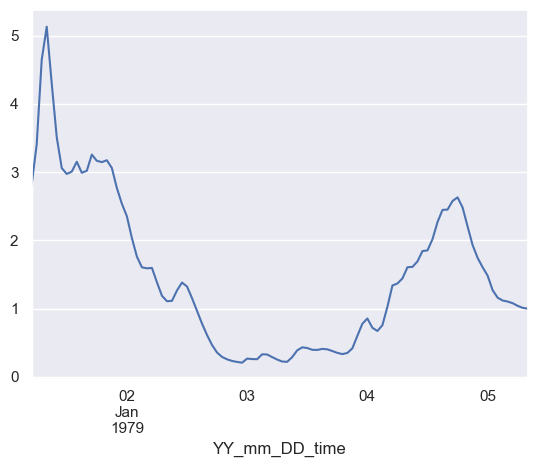

In [45]:
df.hs[:100].plot()

<Axes: xlabel='YY_mm_DD_time'>

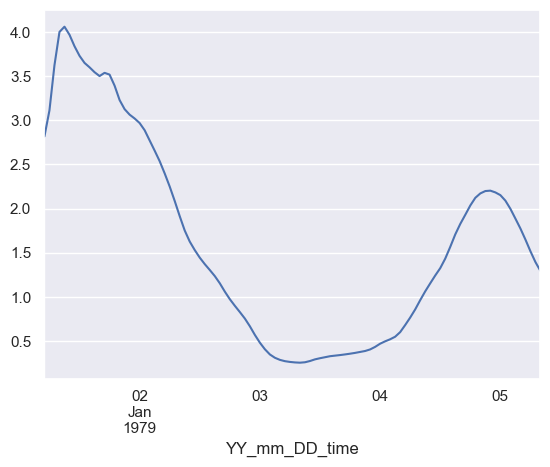

In [46]:
df.rolling('12H').mean().hs[:100].plot()

In [47]:
dfi = df.iloc[:500]

<Axes: xlabel='YY_mm_DD_time'>

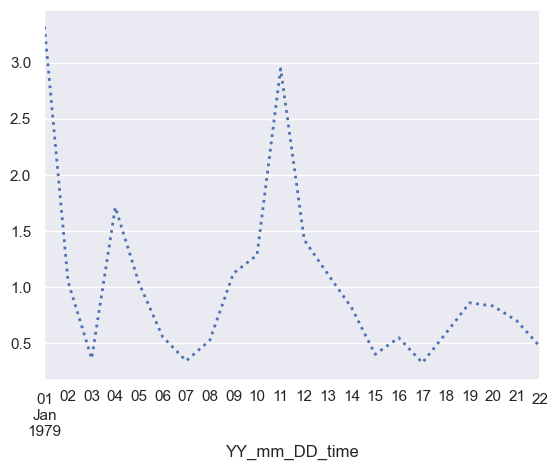

In [48]:
dfi.hs.resample('24H').mean().plot(style=':', linewidth=2)

In [49]:
df.hs.resample('A').mean()

YY_mm_DD_time
1979-12-31    0.716788
1980-12-31    0.669013
1981-12-31    0.690018
1982-12-31    0.620169
1983-12-31    0.610109
1984-12-31    0.705193
1985-12-31    0.605939
1986-12-31    0.637735
1987-12-31    0.646592
1988-12-31    0.639368
1989-12-31    0.541437
1990-12-31    0.596926
1991-12-31    0.584074
1992-12-31    0.623920
1993-12-31    0.664763
1994-12-31    0.616432
1995-12-31    0.653598
1996-12-31    0.630572
1997-12-31    0.589313
1998-12-31    0.646900
1999-12-31    0.683747
2000-12-31    0.673055
Freq: A-DEC, Name: hs, dtype: float64

For up-sampling, ``resample()`` and ``asfreq()`` are largely equivalent, though resample has many more options available.
In this case, the default for both methods is to leave the up-sampled points empty, that is, filled with NA values.
Just as with the ``pd.fillna()`` function discussed previously, ``asfreq()`` accepts a ``method`` argument to specify how values are imputed.
Here, we will resample the business day data at a daily frequency (i.e., including weekends):

In [50]:
annual_max = df.groupby(df.index.year).max()
annual_max

,hs,tm,tp,dirm,dp,spr,h,lm,lp,uw,vw
YY_mm_DD_time,,,,,,,,,,,
1979,5.131,10.8,13.9,359.4,357.7,80.0,80.02,195.60,286.11,17.97,13.48
1980,3.844,10.1,13.5,359.9,359.6,80.7,80.02,168.88,271.40,13.64,13.48
1981,5.507,10.7,13.3,358.7,359.9,79.5,80.02,183.37,264.52,17.22,13.52
1982,4.733,9.2,13.0,358.5,357.9,80.5,80.02,142.52,253.07,17.41,13.98
1983,3.878,9.8,12.2,359.8,360.0,80.1,80.02,159.33,227.27,15.89,11.19
1984,3.787,10.0,13.4,359.0,359.2,80.7,80.02,164.74,266.60,13.56,15.17
1985,4.796,10.3,13.4,360.0,359.5,80.5,80.02,176.13,267.80,16.49,12.25
1986,4.909,10.6,13.3,359.6,357.1,80.0,80.02,190.74,264.06,14.99,10.32
1987,4.119,10.8,150.6,359.5,359.9,80.0,80.02,196.58,4209.63,14.69,11.88


In [51]:
index_hs_max=df.hs.groupby(df.index.year).idxmax()
index_hs_max

YY_mm_DD_time
1979   1979-01-01 08:00:00
1980   1980-12-06 09:00:00
1981   1981-12-08 19:00:00
1982   1982-10-14 19:00:00
1983   1983-11-27 14:00:00
1984   1984-09-23 16:00:00
1985   1985-03-16 16:00:00
1986   1986-01-24 06:00:00
1987   1987-06-15 21:00:00
1988   1988-01-29 20:00:00
1989   1989-02-26 20:00:00
1990   1990-02-27 14:00:00
1991   1991-10-18 18:00:00
1992   1992-03-23 22:00:00
1993   1993-12-24 11:00:00
1994   1994-09-15 17:00:00
1995   1995-01-26 22:00:00
1996   1996-02-19 01:00:00
1997   1997-05-06 21:00:00
1998   1998-04-11 22:00:00
1999   1999-12-28 04:00:00
2000   2000-11-06 13:00:00
Name: hs, dtype: datetime64[ns]

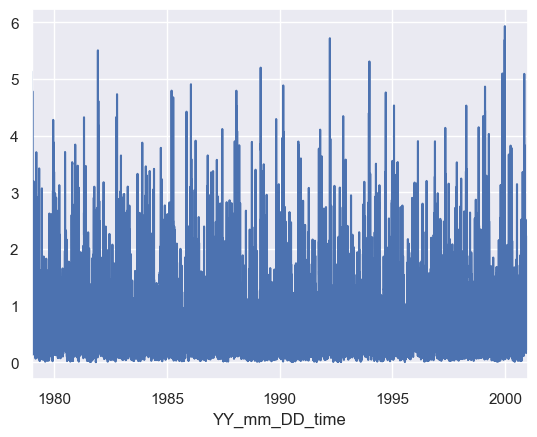

In [52]:
df.hs.plot();

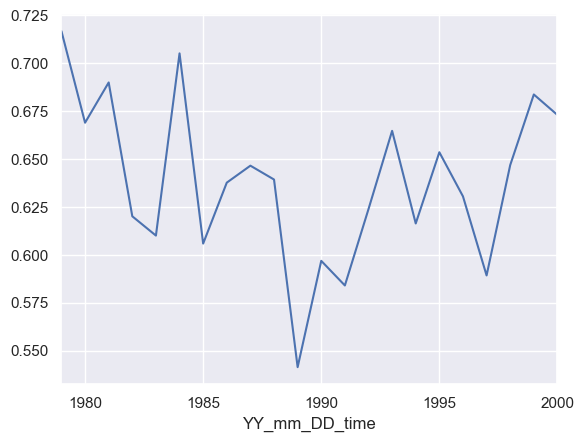

In [53]:
df.hs.resample('1Y').mean().plot();

In [54]:
## Save files
df.to_csv

<left><img src="https://images.prismic.io/coresignal-website/135e2df3-33e4-456a-adb0-73ebaa07bc88_JSON+vs+CSV.png?auto=compress%2Cformat&fit=max&q=90&w=1200&h=1499" alt="save" style="width: 500px;"/></left>



### CSV
Name, Job title  

Jane, Analyst  
Lukas, Developer

### JSON
{“name”:”Jane”,”jobTitle”:”Analyst”}

{“name”:”Lukas”,”jobTitle”:”Developer”}

### Exercise A

- With you new dataframe
- Create a 2x2 figure
- plot variables data, the 1-year resample data, a 3 month rolling month and markers for the  annual maxima: hs for top-left and tm top-right
- plot hs-dirm and tm-dirm scatter on bottom-left and bottom-right

### Exercise B

- With you new dataframe
- Create a 2x2 figure
- plot variables data, the 1-year resample data, a 3 month rolling month and markers for the  annual maxima: tp for top-left and uw top-right
- plot tp-uw and tp-vw scatter on bottom-left and bottom-right

# Seaborn

In [55]:
import numpy as np
import seaborn as sb

In [56]:
# facetting histograms by subsets of data
sb.set(style="darkgrid")

tips = sb.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


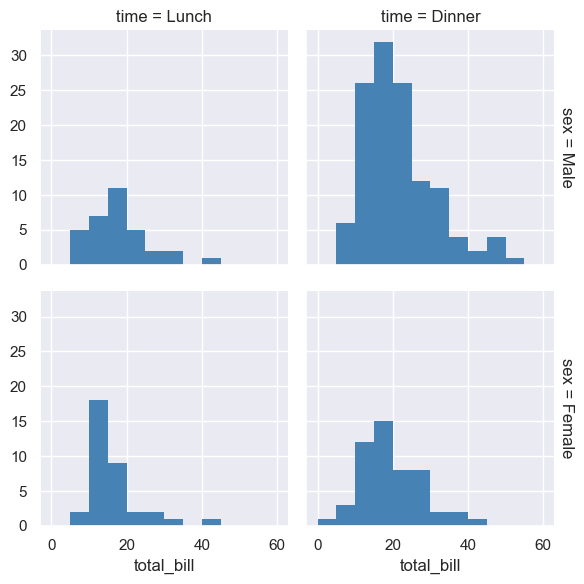

In [57]:
g = sb.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins, lw=0)

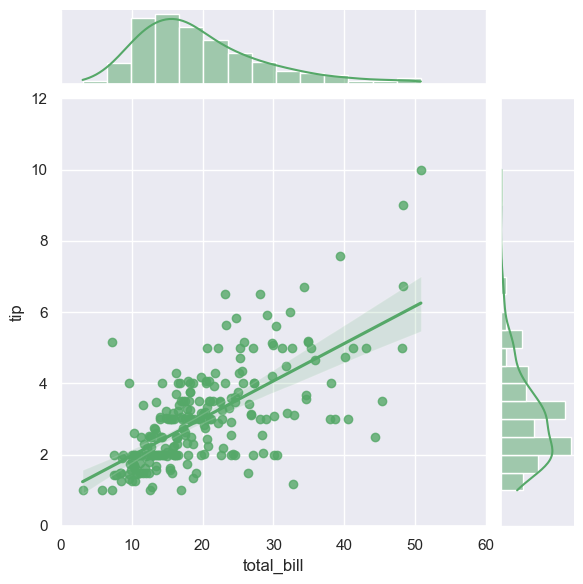

In [58]:
color = sb.color_palette()[2]
g = sb.jointplot(data=tips, x="total_bill", y="tip", kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color=color)

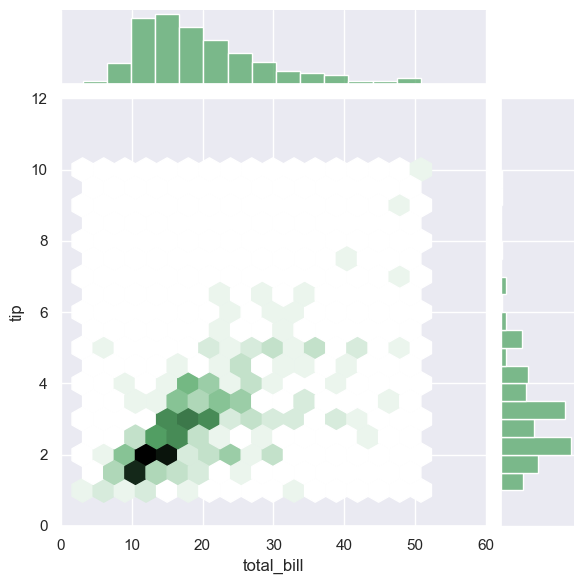

In [59]:
color = sb.color_palette()[2]
g = sb.jointplot(data=tips, x="total_bill", y="tip", kind="hex",
                  xlim=(0, 60), ylim=(0, 12), color=color)